In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import functions.eddy_feedback as ef 
import functions.plotting as plot
import functions.data_wrangling as data
import functions.aos_functions as aos

In [2]:
ds2 = xr.open_mfdataset(
    '/home/links/ct715/data_storage/reanalysis/srip_datasets/TEM_jra55_original.nc',
    parallel=True
)
ds2

OSError: no files to open

In [ ]:
# ds2 = ds2[['EPF_p_pr', 'EPF_phi_pr', 'EPFD_p_pr', 'EPFD_phi_pr']]
# ds2 = ds2.rename({
#     'EPF_p_pr': 'epfz', 'EPF_phi_pr': 'epfy',
#     'EPFD_p_pr': 'divFz', 'EPFD_phi_pr': 'divFy'
# })
# ds1 = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM_ubar_div1.nc',
#     parallel=True
# )
# ds2['ubar'] = ds1.ubar
# ds2.to_netcdf('/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM-pr_EPF_EPFD_ubar.nc')

In [ ]:
ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM-pr_EPF_EPFD_ubar.nc',
    parallel=True
)

# take DJF season and subset to NH
ds = data.data_checker1000(ds)
ds = ds.sel(lat=slice(0,90))
ds = data.seasonal_mean(ds, season='djf', cut_ends=True)
ds

<xarray.Dataset>
Dimensions:  (time: 58, level: 22, lat: 37)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 0.0 2.5 5.0 7.5 10.0 ... 80.0 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1958-12-01 1959-12-01 ... 2015-12-01
Data variables:
    epfz     (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    epfy     (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    divFz    (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    divFy    (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
Attributes:
    Title:                     Transformed Eulerian Mean (TEM) diagnostics / ...
    Description:               EP flux and other terms from the TEM equations...
    Reanalysis:                jra_55
    Project_Homepage:          http://s-rip.ees.hokudai.ac.jp/
    SPARC_Homepage:            http://www.sparc-climate.org/
    Author:                    Patrick Martineau
    Report_issues_with_data:   patrick.martineau2@mail.mcgill.ca
    Creation_Date:             15-Oct-2017 09:41:14
    history:                   Sun Oct 15 09:41:14 2017: ncra /data/A/SRIP_da...
    nco_openmp_thread_number:  1

### Plot ubar and divFy

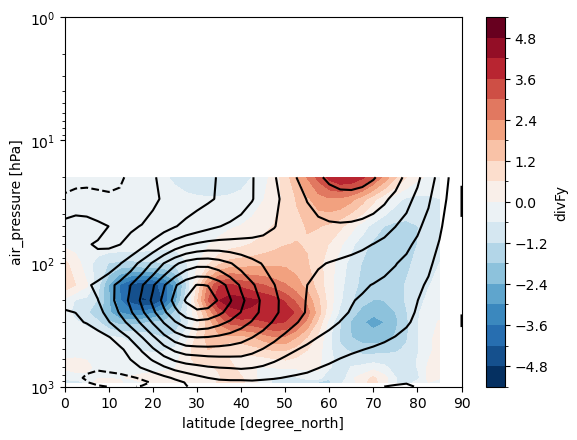

In [ ]:
ds = ds.where(ds.level > 10.)

ds['divFy'] = ds['divFy'] * 86400

ds.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
ds.divFy.mean('time').plot.contourf(levels=20, yincrease=False)

### Plot ubar and divFz

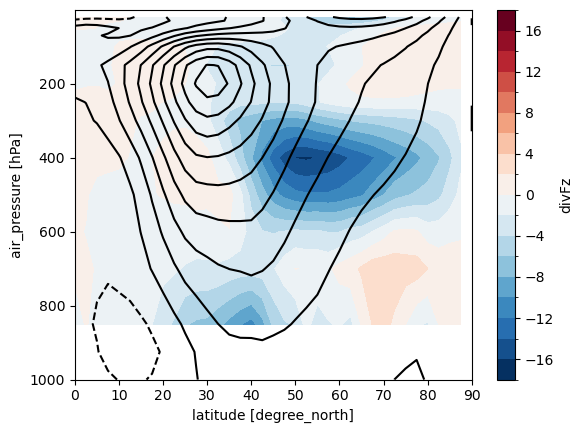

In [ ]:
ds = ds.where(ds.level > 10.)

ds['divFz'] = ds['divFz'] * 86400

ds.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
ds.divFz.mean('time').plot.contourf(levels=20, yincrease=False)

### Plot ubar and total divF

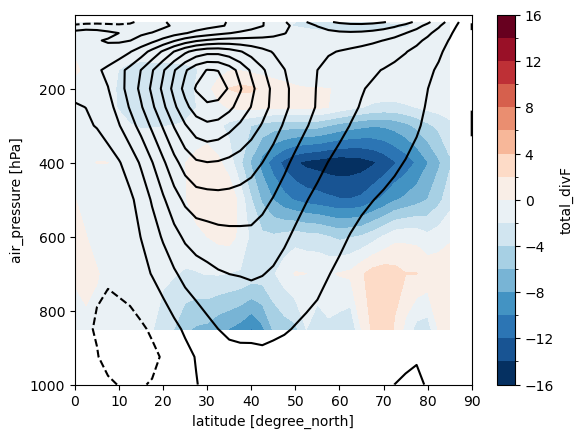

In [ ]:
ds = ds.where(ds.level > 10.)
ds['total_divF'] = ds.divFy + ds.divFz

ds.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
ds.total_divF.mean('time').plot.contourf(levels=20, yincrease=False)

In [ ]:
ds.divFz.units

'm s-2'

In [ ]:
ds.divFy.units

'm s-2'